In [1]:
import pandas as pd
from os import listdir

In [2]:
data_path = 'data/'

# Load all data (csv) files to DataFrames

### Files in 'data/'
* sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
* test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
* sample_submission.csv - a sample submission file in the correct format.
* items.csv - supplemental information about the items/products.
* item_categories.csv  - supplemental information about the items categories.
* shops.csv- supplemental information about the shops.

In [3]:
csv_files = [f.replace('.csv', '') for f in listdir(data_path) if f.endswith('csv')]
print('CSV files: ', csv_files)

df = dict.fromkeys(csv_files)
for name in csv_files:
    df[name] = pd.read_csv('data/' + name + '.csv')

CSV files:  ['sales_train', 'shops', 'test', 'item_categories', 'items', 'sample_submission']


# Preview sales_train

In [4]:
df['sales_train'].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
df['sales_train'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
df['sales_train'].isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [7]:
df['sales_train'].describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


* No null values
* *item_price & item_cnt_day include negative values*

## Duplicate Rows

In [8]:
print('Number of duplicates:', df['sales_train'].duplicated().sum())
df['sales_train'][df['sales_train'].duplicated()]

Number of duplicates: 6


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


# Preview sample_submission

In [9]:
df['sample_submission'].head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


# Preview items

In [10]:
df['items'].head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
df['items'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [12]:
print(len(df['items']['item_id'].unique()), 'unique items.')

22170 unique items.


# Preview item_categories

In [13]:
df['item_categories'].head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [14]:
df['item_categories'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [15]:
print(len(df['item_categories']['item_category_id'].unique()), 'unique item categories.')

84 unique item categories.


# Preview shops

In [16]:
df['shops'].head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [17]:
df['shops'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [18]:
print(len(df['shops']['shop_id'].unique()), 'unique shops.')

60 unique shops.


# First Thoughts:
* Data seems pretty clean so far, no null values in *individual files*
* There are 6 duplicate rows in the train data - *kept for now*
* Found negative values 
    - item_price has one - **to be removed**
    - item_cnt_day has it *for returns*
* Unique values:
    - 22,170 items
    - 84 item categories
    - 60 shops
* Plan to outer join sales_train with items, item_categories, shops
 1. sales_train + items on item_id --> **train_df**
 2. **train_df** + item_categories on item_category_id
 3. **train_df** + shops on shop_id

In [19]:
train_df = pd.merge(df['sales_train'], df['items'], on='item_id', how='outer')

In [20]:
train_df = pd.merge(train_df, df['item_categories'], on='item_category_id', how='outer')

In [21]:
train_df = pd.merge(train_df, df['shops'], on='shop_id', how='outer')

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2936212 entries, 0 to 2936211
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      float64
 2   shop_id             float64
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(4), int64(2), object(4)
memory usage: 246.4+ MB


## Check for items/shops added by outer joining

In [23]:
train_df.shape[0] - df['sales_train'].shape[0]

363

In [24]:
train_df.isnull().sum()

date                  363
date_block_num        363
shop_id               363
item_id                 0
item_price            363
item_cnt_day          363
item_name               0
item_category_id        0
item_category_name      0
shop_name             363
dtype: int64

In [25]:
train_df[train_df['shop_name'].isnull()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2899288,NaN,NaN,NaN,13805,NaN,NaN,ЛЕВША (BD),37,Кино - Blu-Ray,NaN
2899289,NaN,NaN,NaN,14648,NaN,NaN,МИССИЯ НЕВЫПОЛНИМА ПЛЕМЯ ИЗГОЕВ (2BD),37,Кино - Blu-Ray,NaN
2899290,NaN,NaN,NaN,19775,NaN,NaN,ТРАНСФОРМЕРЫ (4BD),37,Кино - Blu-Ray,NaN
2899291,NaN,NaN,NaN,1253,NaN,NaN,ADELE 25 LP,58,Музыка - Винил,NaN
2899292,NaN,NaN,NaN,1679,NaN,NaN,BILLY`S BAND Парижские сезоны LP,58,Музыка - Винил,NaN
...,...,...,...,...,...,...,...,...,...,...
2899646,NaN,NaN,NaN,14972,NaN,NaN,Манга Переживая юность,47,"Книги - Комиксы, манга",NaN
2899647,NaN,NaN,NaN,8545,NaN,NaN,Артбук The Art Of Bubble,42,"Книги - Артбуки, энциклопедии",NaN
2899648,NaN,NaN,NaN,8549,NaN,NaN,Артбук Мир игры Rise Of The Tomb Raider,42,"Книги - Артбуки, энциклопедии",NaN
2899649,NaN,NaN,NaN,8551,NaN,NaN,Артбук Мир игры Total War,42,"Книги - Артбуки, энциклопедии",NaN


In [26]:
train_df = train_df.dropna()

In [27]:
train_df.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

## Remove one item with negative price

In [28]:
train_df[train_df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2256678,15.05.2013,4.0,32.0,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,"Москва ТЦ ""Серебряный Дом"""


In [29]:
train_df = train_df.drop(index=2256678)

In [30]:
train_df[train_df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name


### Data fields
* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* item_category_id - unique identifier of item category
* item_cnt_day - number of products sold. You are predicting a * monthly amount of this measure
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* item_category_name - name of item category

In [31]:
train_df.nunique()

date                   1034
date_block_num           34
shop_id                  60
item_id               21807
item_price            19992
item_cnt_day            198
item_name             21807
item_category_id         84
item_category_name       84
shop_name                60
dtype: int64

* *363 items not in train data*

In [32]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3.0,59.0,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8.0,59.0,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935848 entries, 0 to 2936211
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      float64
 2   shop_id             float64
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(4), int64(2), object(4)
memory usage: 246.4+ MB


In [34]:
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06
mean,1.456992e+01,3.300173e+01,1.019723e+04,8.908535e+02,1.242641e+00,4.000139e+01
std,9.422987e+00,1.622698e+01,6.324297e+03,1.729800e+03,2.618835e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


# Add monthly sales by shop_id, item_id, date_block_num

In [46]:
item_cnt_month_series = train_df.groupby(['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum()

In [47]:
item_cnt_month_series.name = 'item_cnt_month'

In [48]:
item_cnt_month_series

shop_id  item_id  date_block_num
0.0      30       1.0               31.0
         31       1.0               11.0
         32       0.0                6.0
                  1.0               10.0
         33       0.0                3.0
                                    ... 
59.0     22164    27.0               2.0
                  30.0               1.0
         22167    9.0                1.0
                  11.0               2.0
                  17.0               1.0
Name: item_cnt_month, Length: 1609124, dtype: float64

In [37]:
item_cnt_month_df = pd.DataFrame(item_cnt_month_series).reset_index()

In [38]:
item_cnt_month_df.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,0.0,30,1.0,31.0
1,0.0,31,1.0,11.0
2,0.0,32,0.0,6.0
3,0.0,32,1.0,10.0
4,0.0,33,0.0,3.0


In [39]:
train_df = train_df.merge(item_cnt_month_df)

In [54]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,item_cnt_month
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1.0
1,26.04.2013,3.0,59.0,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1.0
2,26.06.2013,5.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1.0
3,20.07.2013,6.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1.0
4,14.09.2013,8.0,59.0,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2.0


# EDA

## Helper Functions

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_counts(fig, ax, x, hue=None):
    sns.countplot(x, hue)

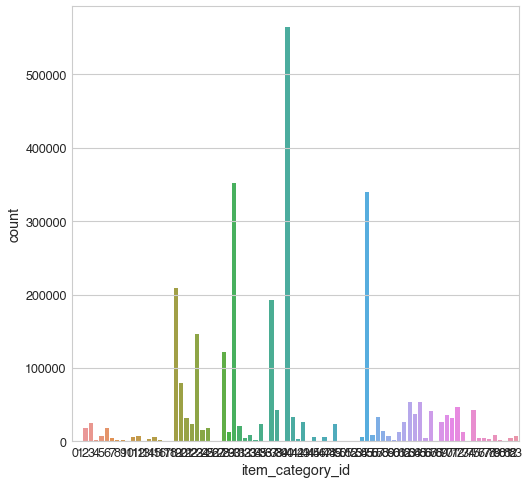

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
# plot_counts(fig, ax, train_df['item_category_id'])

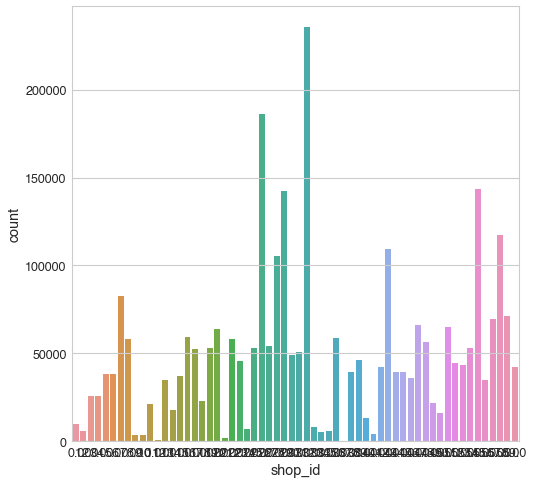

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
# plot_counts(fig, ax, train_df['shop_id'])